In [ ]:
# -------------------------------
# Standalone cell: Plot character distribution of coarse_cleaned_patents.jsonl
# -------------------------------
import json
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

input_file = "coarse_cleaned_patents.jsonl"

# --- Collect character lengths ---
lengths = []
with open(input_file, "r", encoding="utf-8") as f:
    for line in tqdm(f, desc="Calculating document lengths"):
        doc = json.loads(line)
        combined_text = (doc.get("description", "") + " " + doc.get("claim1", "")).strip()
        lengths.append(len(combined_text))

# --- Stats ---
avg_len = np.mean(lengths)
median_len = np.median(lengths)
max_len = max(lengths)

print(f"Documents: {len(lengths)}")
print(f"Average characters: {avg_len:.0f}")
print(f"Median characters: {median_len:.0f}")
print(f"Max characters: {max_len}")

# --- Plot histogram ---
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(lengths, bins=50, kde=False, color="blue")

plt.axvline(avg_len, color="red", linestyle="--", linewidth=2, label=f"Mean: {avg_len:.0f}")
plt.axvline(median_len, color="green", linestyle="-.", linewidth=2, label=f"Median: {median_len:.0f}")

plt.title("Character Length Distribution of coarse_cleaned_patents.jsonl")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Documents")
plt.legend()
plt.tight_layout()
plt.show()


95th percentile length: 151908 characters
Documents before cutoff: 95068, after cutoff: 90314


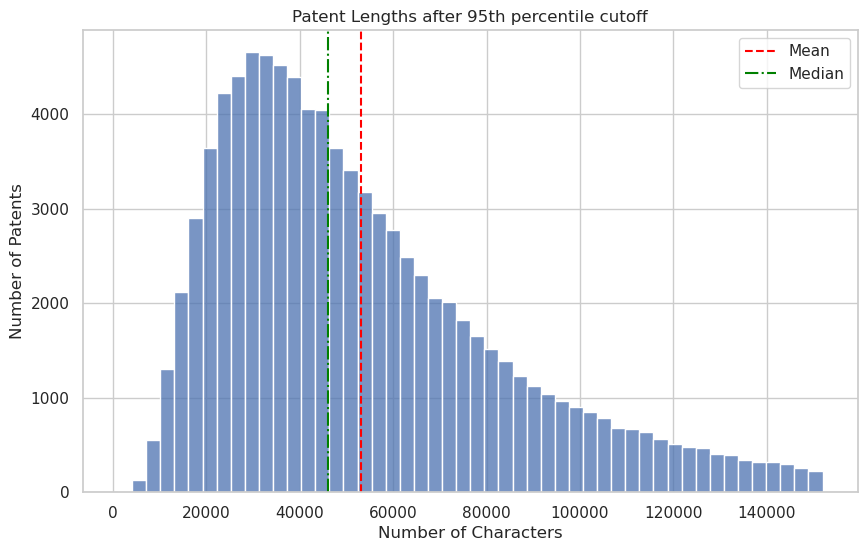

In [2]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input_file = "coarse_cleaned_patents.jsonl"
output_file_cut = "coarse_cleaned_patents_cut95.jsonl"

# Load documents and lengths
records = []
lengths = []

with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        rec = json.loads(line)
        combined = (rec.get("description","") + " " + rec.get("claim1","")).strip()
        combined_len = len(combined)
        rec["length"] = combined_len
        records.append(rec)
        lengths.append(combined_len)

# Compute 95th percentile cutoff
cutoff = np.percentile(lengths, 95)
print(f"95th percentile length: {cutoff:.0f} characters")

# Filter
filtered = [r for r in records if r["length"] <= cutoff]
print(f"Documents before cutoff: {len(records)}, after cutoff: {len(filtered)}")

# Save filtered JSONL
with open(output_file_cut, "w", encoding="utf-8") as f_out:
    for r in filtered:
        out_rec = {k: r[k] for k in ["description","claim1"]}
        f_out.write(json.dumps(out_rec, ensure_ascii=False) + "\n")

# Plot histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot([r["length"] for r in filtered], bins=50, kde=False)
plt.axvline(np.mean([r["length"] for r in filtered]), color="red", linestyle="--", label="Mean")
plt.axvline(np.median([r["length"] for r in filtered]), color="green", linestyle="-.", label="Median")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Patents")
plt.title("Patent Lengths after 95th percentile cutoff")
plt.legend()
plt.show()


90th percentile length: 114976 characters
Documents before cutoff: 95068, after cutoff: 85561


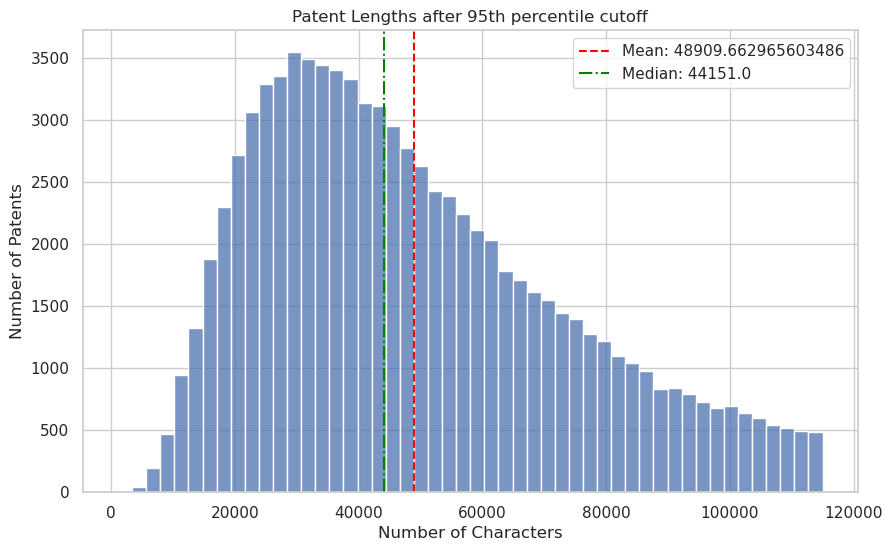

In [3]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input_file = "coarse_cleaned_patents.jsonl"
output_file_cut = "coarse_cleaned_patents_cut90.jsonl"

# Load documents and lengths
records = []
lengths = []

with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        rec = json.loads(line)
        combined = (rec.get("description","") + " " + rec.get("claim1","")).strip()
        combined_len = len(combined)
        rec["length"] = combined_len
        records.append(rec)
        lengths.append(combined_len)

# Compute 90th percentile cutoff
cutoff = np.percentile(lengths, 90)
print(f"90th percentile length: {cutoff:.0f} characters")

# Filter
filtered = [r for r in records if r["length"] <= cutoff]
print(f"Documents before cutoff: {len(records)}, after cutoff: {len(filtered)}")

# Save filtered JSONL
with open(output_file_cut, "w", encoding="utf-8") as f_out:
    for r in filtered:
        out_rec = {k: r[k] for k in ["description","claim1"]}
        f_out.write(json.dumps(out_rec, ensure_ascii=False) + "\n")

mean = np.mean([r["length"] for r in filtered])
median = np.median([r["length"] for r in filtered])

# Plot histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot([r["length"] for r in filtered], bins=50, kde=False)
plt.axvline(mean, color="red", linestyle="--", label=f"Mean: {mean}")
plt.axvline(median, color="green", linestyle="-.", label=f"Median: {median}")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Patents")
plt.title("Patent Lengths after 95th percentile cutoff")
plt.legend()
plt.show()


In [5]:
from huggingface_hub import notebook_login

notebook_login()

In [6]:
from datasets import load_dataset

# Load the JSONL file
dataset = load_dataset("json", data_files="coarse_cleaned_patents_cut90.jsonl")

dataset = dataset["train"]

# Push to Hugging Face Hub
dataset.push_to_hub("mhurhangee/ep-patents-coarse-cleaned",commit_message="Commiting with 10% longest patents trimmed")

Generating train split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/9 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  199kB /  164MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  162MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  164MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  164MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  259kB /  164MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   5%|4         | 7.52MB /  161MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  163MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  165MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  164MB            

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mhurhangee/ep-patents-coarse-cleaned/commit/78969a59939d74c548f1061db9e2f278ac2d3702', commit_message='Commiting with 10% longest patents trimmed', commit_description='', oid='78969a59939d74c548f1061db9e2f278ac2d3702', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/mhurhangee/ep-patents-coarse-cleaned', endpoint='https://huggingface.co', repo_type='dataset', repo_id='mhurhangee/ep-patents-coarse-cleaned'), pr_revision=None, pr_num=None)

# Remove longest description and claims

90th percentile description length: 113306, claim1 length: 2514
Documents before cutoff: 95068, after cutoff: 77393


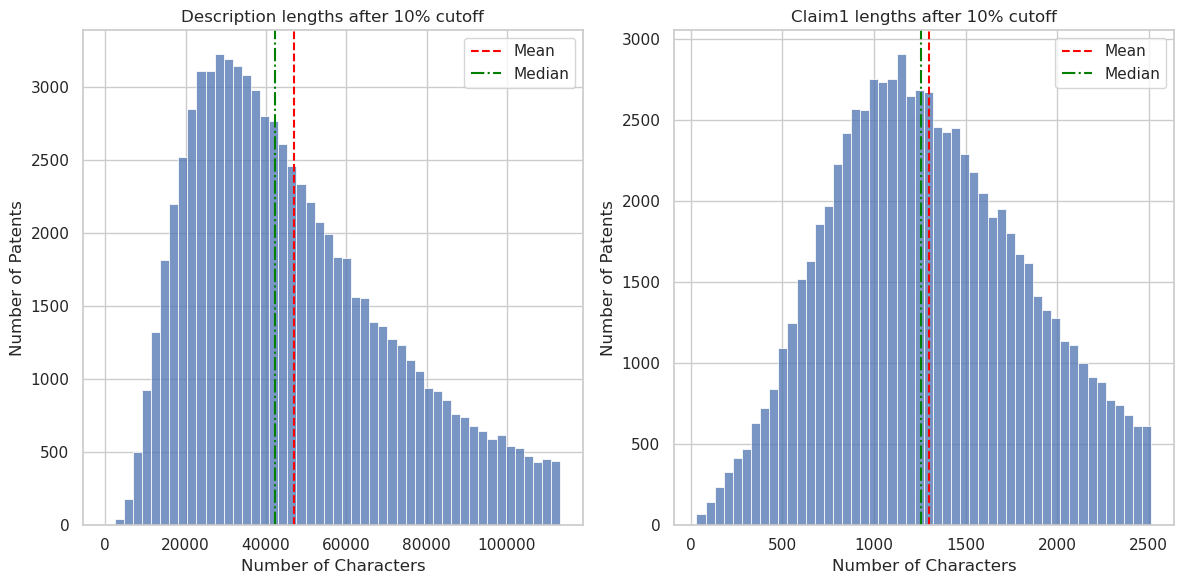

In [8]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input_file = "coarse_cleaned_patents.jsonl"
output_file_cut10 = "coarse_cleaned_patents_trimmed.jsonl"

records = []
desc_lengths = []
claim_lengths = []

# Load records and measure lengths separately
with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        rec = json.loads(line)
        desc_text = rec.get("description","").strip()
        claim_text = rec.get("claim1","").strip()
        rec["desc_length"] = len(desc_text)
        rec["claim_length"] = len(claim_text)
        records.append(rec)
        desc_lengths.append(len(desc_text))
        claim_lengths.append(len(claim_text))

# Compute 90th percentile cutoffs
desc_cutoff = np.percentile(desc_lengths, 90)
claim_cutoff = np.percentile(claim_lengths, 90)
print(f"90th percentile description length: {desc_cutoff:.0f}, claim1 length: {claim_cutoff:.0f}")

# Filter patents exceeding either cutoff
filtered = [
    r for r in records
    if r["desc_length"] <= desc_cutoff and r["claim_length"] <= claim_cutoff
]
print(f"Documents before cutoff: {len(records)}, after cutoff: {len(filtered)}")

# Save filtered JSONL
with open(output_file_cut10, "w", encoding="utf-8") as f_out:
    for r in filtered:
        out_rec = {k: r[k] for k in ["description","claim1"]}
        f_out.write(json.dumps(out_rec, ensure_ascii=False) + "\n")

# Plot histogram for descriptions and claims
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot([r["desc_length"] for r in filtered], bins=50, kde=False)
plt.axvline(np.mean([r["desc_length"] for r in filtered]), color="red", linestyle="--", label="Mean")
plt.axvline(np.median([r["desc_length"] for r in filtered]), color="green", linestyle="-.", label="Median")
plt.title("Description lengths after 10% cutoff")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Patents")
plt.legend()

plt.subplot(1,2,2)
sns.histplot([r["claim_length"] for r in filtered], bins=50, kde=False)
plt.axvline(np.mean([r["claim_length"] for r in filtered]), color="red", linestyle="--", label="Mean")
plt.axvline(np.median([r["claim_length"] for r in filtered]), color="green", linestyle="-.", label="Median")
plt.title("Claim1 lengths after 10% cutoff")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Patents")
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
from datasets import load_dataset

# Load the JSONL file
dataset = load_dataset("json", data_files="coarse_cleaned_patents_trimmed.jsonl")

dataset = dataset["train"]

# Push to Hugging Face Hub
dataset.push_to_hub("mhurhangee/ep-patents-coarse-cleaned",commit_message="Commiting with 10% longest description and claims trimmed")

Generating train split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/8 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  428kB /  166MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   5%|4         | 7.89MB /  163MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  167MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  167MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  164MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  163MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  166MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  167MB            

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mhurhangee/ep-patents-coarse-cleaned/commit/9f82c430c6e3773e7c7d56a44c5cd65bf2e1ca53', commit_message='Commiting with 10% longest description and claims trimmed', commit_description='', oid='9f82c430c6e3773e7c7d56a44c5cd65bf2e1ca53', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/mhurhangee/ep-patents-coarse-cleaned', endpoint='https://huggingface.co', repo_type='dataset', repo_id='mhurhangee/ep-patents-coarse-cleaned'), pr_revision=None, pr_num=None)

Description length cutoffs: 11708-113306
Claim1 length cutoffs: 323-2514
Documents before filtering: 95068, after filtering: 74002


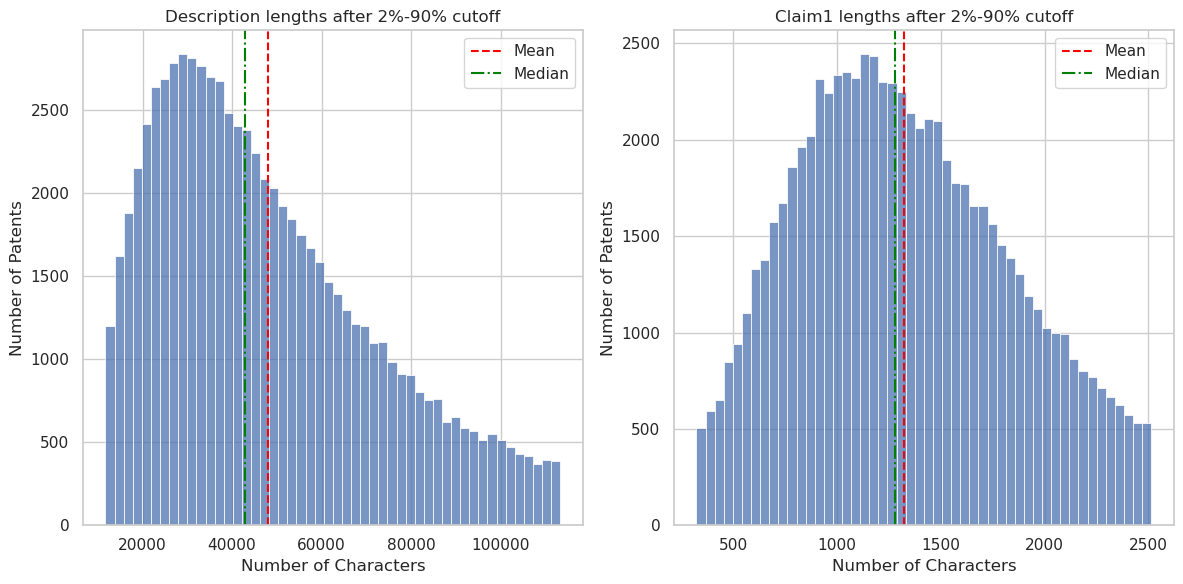

In [11]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input_file = "coarse_cleaned_patents.jsonl"
output_file_filtered = "coarse_cleaned_patents_filtered.jsonl"

records = []
desc_lengths = []
claim_lengths = []

# Load records and measure lengths separately
with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        rec = json.loads(line)
        desc_text = rec.get("description","").strip()
        claim_text = rec.get("claim1","").strip()
        rec["desc_length"] = len(desc_text)
        rec["claim_length"] = len(claim_text)
        records.append(rec)
        desc_lengths.append(len(desc_text))
        claim_lengths.append(len(claim_text))

# Compute 2nd and 90th percentile cutoffs
desc_low, desc_high = np.percentile(desc_lengths, [2, 90])
claim_low, claim_high = np.percentile(claim_lengths, [2, 90])
print(f"Description length cutoffs: {desc_low:.0f}-{desc_high:.0f}")
print(f"Claim1 length cutoffs: {claim_low:.0f}-{claim_high:.0f}")

# Filter patents outside these bounds
filtered = [
    r for r in records
    if desc_low <= r["desc_length"] <= desc_high
    and claim_low <= r["claim_length"] <= claim_high
]
print(f"Documents before filtering: {len(records)}, after filtering: {len(filtered)}")

# Save filtered JSONL
with open(output_file_filtered, "w", encoding="utf-8") as f_out:
    for r in filtered:
        out_rec = {k: r[k] for k in ["description","claim1"]}
        f_out.write(json.dumps(out_rec, ensure_ascii=False) + "\n")

# Plot histogram for descriptions and claims
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot([r["desc_length"] for r in filtered], bins=50, kde=False)
plt.axvline(np.mean([r["desc_length"] for r in filtered]), color="red", linestyle="--", label="Mean")
plt.axvline(np.median([r["desc_length"] for r in filtered]), color="green", linestyle="-.", label="Median")
plt.title("Description lengths after 2%-90% cutoff")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Patents")
plt.legend()

plt.subplot(1,2,2)
sns.histplot([r["claim_length"] for r in filtered], bins=50, kde=False)
plt.axvline(np.mean([r["claim_length"] for r in filtered]), color="red", linestyle="--", label="Mean")
plt.axvline(np.median([r["claim_length"] for r in filtered]), color="green", linestyle="-.", label="Median")
plt.title("Claim1 lengths after 2%-90% cutoff")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Patents")
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
from datasets import load_dataset

# Load the JSONL file
dataset = load_dataset("json", data_files="coarse_cleaned_patents_filtered.jsonl")

dataset = dataset["train"]

# Push to Hugging Face Hub
dataset.push_to_hub("mhurhangee/ep-patents-coarse-cleaned",commit_message="Commiting with 10% longest descriptions and claims trimmed and shortest 2%")

Generating train split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/8 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  524kB /  161MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   1%|          |  851kB /  159MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  162MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  162MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  159MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  159MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   2%|2         | 3.67MB /  161MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   5%|4         | 7.34MB /  162MB            

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mhurhangee/ep-patents-coarse-cleaned/commit/ad0769efaa5d7ae554312d476da6e74a65d6ad81', commit_message='Commiting with 10% longest descriptions and claims trimmed and shortest 2%', commit_description='', oid='ad0769efaa5d7ae554312d476da6e74a65d6ad81', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/mhurhangee/ep-patents-coarse-cleaned', endpoint='https://huggingface.co', repo_type='dataset', repo_id='mhurhangee/ep-patents-coarse-cleaned'), pr_revision=None, pr_num=None)